In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

# Once mounted, you can access your Drive files at '/content/drive/My Drive'
print("Drive mounted successfully!")

Mounted at /content/drive
Drive mounted successfully!


1. Load financial  Data

In [20]:
# Load datasets
raw_analyst_ratings = pd.read_csv('/content/drive/MyDrive/raw_analyst_ratings.csv/raw_analyst_rating.csv.csv') # corrected path to the actual CSV file
AAPL_historical_data = pd.read_csv('/content/drive/MyDrive/yfinance_data/yfinance_data/AAPL_historical_data.csv')
GOOG_historical_data = pd.read_csv('/content/drive/MyDrive/yfinance_data/yfinance_data/GOOG_historical_data.csv')
META_historical_data = pd.read_csv('/content/drive/MyDrive/yfinance_data/yfinance_data/META_historical_data.csv')
MSFT_historical_data = pd.read_csv('/content/drive/MyDrive/yfinance_data/yfinance_data/MSFT_historical_data.csv')
NVDA_historical_data = pd.read_csv('/content/drive/MyDrive/yfinance_data/yfinance_data/NVDA_historical_data.csv')
TSLA_historical_data = pd.read_csv('/content/drive/MyDrive/yfinance_data/yfinance_data/TSLA_historical_data.csv')

2. Perform Exploratory Data Analysis (EDA)

  Descriptive Statistics

In [23]:
# List of datasets to process
datasets = {
    "raw_analyst_ratings": raw_analyst_ratings,
    "AAPL_historical_data": AAPL_historical_data,
    "GOOG_historical_data": GOOG_historical_data,
    "META_historical_data": META_historical_data,
    "MSFT_historical_data": MSFT_historical_data,
    "NVDA_historical_data": NVDA_historical_data,
    "TSLA_historical_data": TSLA_historical_data,
}

# Process each dataset
for name, df in datasets.items():
    if 'date' in df.columns:  # Check if 'date' column exists
        print(f"Processing datetime for {name}")
        # Convert 'date' column to datetime
        df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

        # Handle invalid dates
        invalid_dates = df[df['date'].isnull()]
        if len(invalid_dates) > 0:
            print(f"{len(invalid_dates)} invalid dates found in {name}. Dropping invalid rows.")
            df.dropna(subset=['date'], inplace=True)
    else:
        print(f"No 'date' column in {name}. Skipping datetime processing.")

# Verify the results
for name, df in datasets.items():
    if 'date' in df.columns:
        print(f"First 5 dates in {name}:")
        print(df['date'].head())


Processing datetime for raw_analyst_ratings
1407156 invalid dates found in raw_analyst_ratings. Dropping invalid rows.
No 'date' column in AAPL_historical_data. Skipping datetime processing.
No 'date' column in GOOG_historical_data. Skipping datetime processing.
No 'date' column in META_historical_data. Skipping datetime processing.
No 'date' column in MSFT_historical_data. Skipping datetime processing.
No 'date' column in NVDA_historical_data. Skipping datetime processing.
No 'date' column in TSLA_historical_data. Skipping datetime processing.
First 5 dates in raw_analyst_ratings:
0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]


In [24]:
# List of datasets
datasets = {
    "raw_analyst_ratings": raw_analyst_ratings,
    "AAPL_historical_data": AAPL_historical_data,
    "GOOG_historical_data": GOOG_historical_data,
    "META_historical_data": META_historical_data,
    "MSFT_historical_data": MSFT_historical_data,
    "NVDA_historical_data": NVDA_historical_data,
    "TSLA_historical_data": TSLA_historical_data
}

# EDA Results
eda_results = {}

for name, data in datasets.items():
    print(f"EDA for {name}:")

    # General info
    print("\n--- General Info ---")
    print(data.info())

    # Descriptive statistics for numeric columns
    print("\n--- Descriptive Statistics (Numeric) ---")
    print(data.describe())

    # Descriptive statistics for categorical columns
    print("\n--- Descriptive Statistics (Categorical) ---")
    categorical_data = data.select_dtypes(include=['object', 'category'])
    print(categorical_data.describe())

    # Missing values
    print("\n--- Missing Values ---")
    print(data.isnull().sum())

    # Correlation matrix (only for numeric columns)
    print("\n--- Correlation Matrix ---")
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    print(numeric_data.corr())

    # Store results for later access
    eda_results[name] = {
        "info": data.info(),
        "numeric_stats": data.describe(),
        "categorical_stats": categorical_data.describe(),
        "missing_values": data.isnull().sum(),
        "correlation_matrix": numeric_data.corr()
    }
    print("\n\n")


EDA for raw_analyst_ratings:

--- General Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 1399256
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Unnamed: 0       172 non-null    int64                    
 1   headline         172 non-null    object                   
 2   url              172 non-null    object                   
 3   publisher        172 non-null    object                   
 4   date             172 non-null    datetime64[ns, UTC-04:00]
 5   stock            172 non-null    object                   
 6   headline_length  172 non-null    int64                    
dtypes: datetime64[ns, UTC-04:00](1), int64(2), object(4)
memory usage: 10.8+ KB
None

--- Descriptive Statistics (Numeric) ---
         Unnamed: 0  headline_length
count  1.720000e+02       172.000000
mean   6.304914e+05        40.331395
std    4.373790e+05         9.8

In [30]:
# Check the columns in GOOG_historical_data
print(GOOG_historical_data.columns)

# Check for the first few rows to identify relevant columns
print(GOOG_historical_data.head())


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [33]:
# Check the columns in GOOG_historical_data
print(META_historical_data.columns)

# Check for the first few rows to identify relevant columns
print(META_historical_data.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
         Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0  


In [34]:
# Check the columns in GOOG_historical_data
print(MSFT_historical_data.columns)

# Check for the first few rows to identify relevant columns
print(MSFT_historical_data.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [35]:
# Check the columns in GOOG_historical_data
print(NVDA_historical_data.columns)

# Check for the first few rows to identify relevant columns
print(NVDA_historical_data.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [36]:
# Check the columns in GOOG_historical_data
print(TSLA_historical_data.columns)

# Check for the first few rows to identify relevant columns
print(TSLA_historical_data.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [37]:
# Check the columns in each dataset to confirm the presence of 'headline_length' and 'publisher'
datasets = {
    "GOOG_historical_data": GOOG_historical_data,
    "META_historical_data": META_historical_data,
    "MSFT_historical_data": MSFT_historical_data,
    "NVDA_historical_data": NVDA_historical_data,
    "TSLA_historical_data": TSLA_historical_data
}

# Loop through datasets and print the columns
for dataset_name, data in datasets.items():
    print(f"Columns in {dataset_name}:")
    print(data.columns)
    print("="*50)


Columns in GOOG_historical_data:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Columns in META_historical_data:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Columns in MSFT_historical_data:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Columns in NVDA_historical_data:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
Columns in TSLA_historical_data:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


3. Sentiment Analysis
Use TextBlob for simplicity

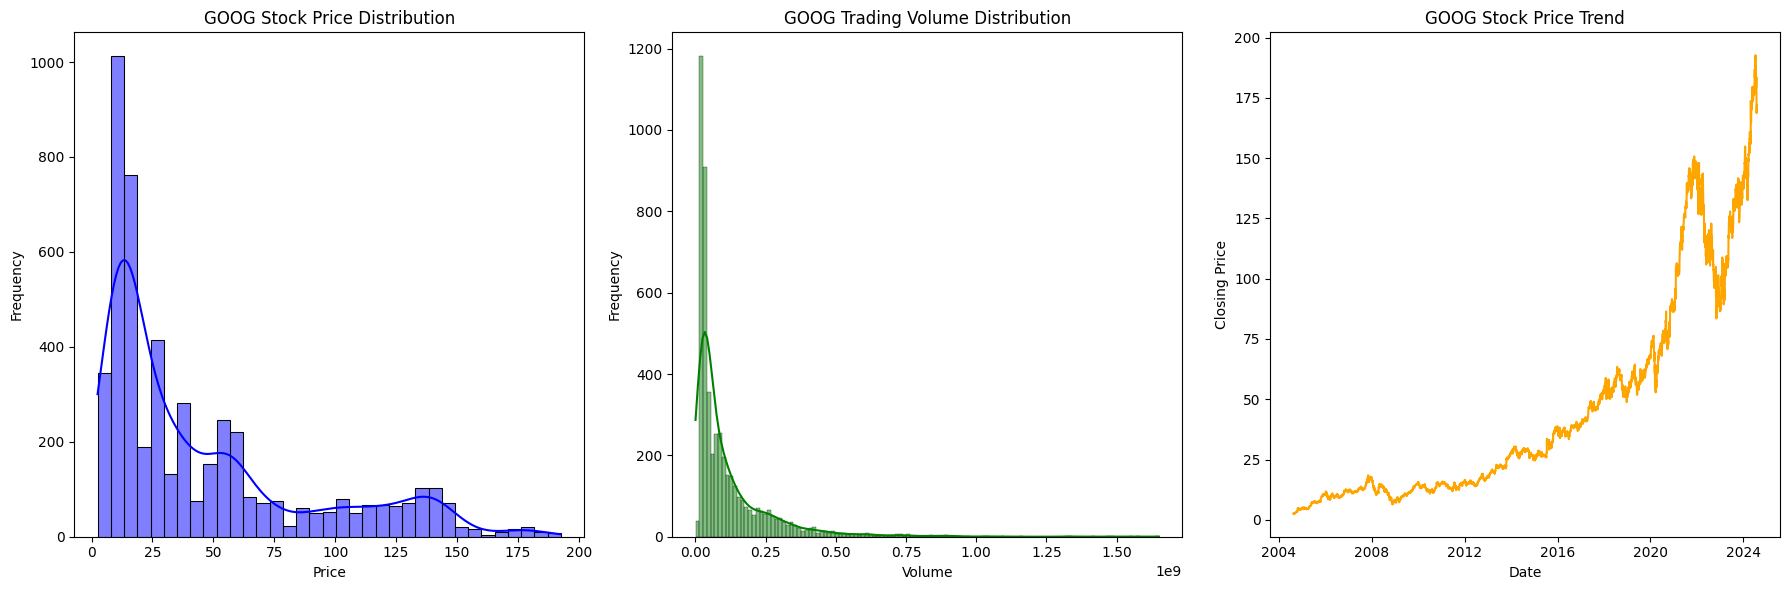

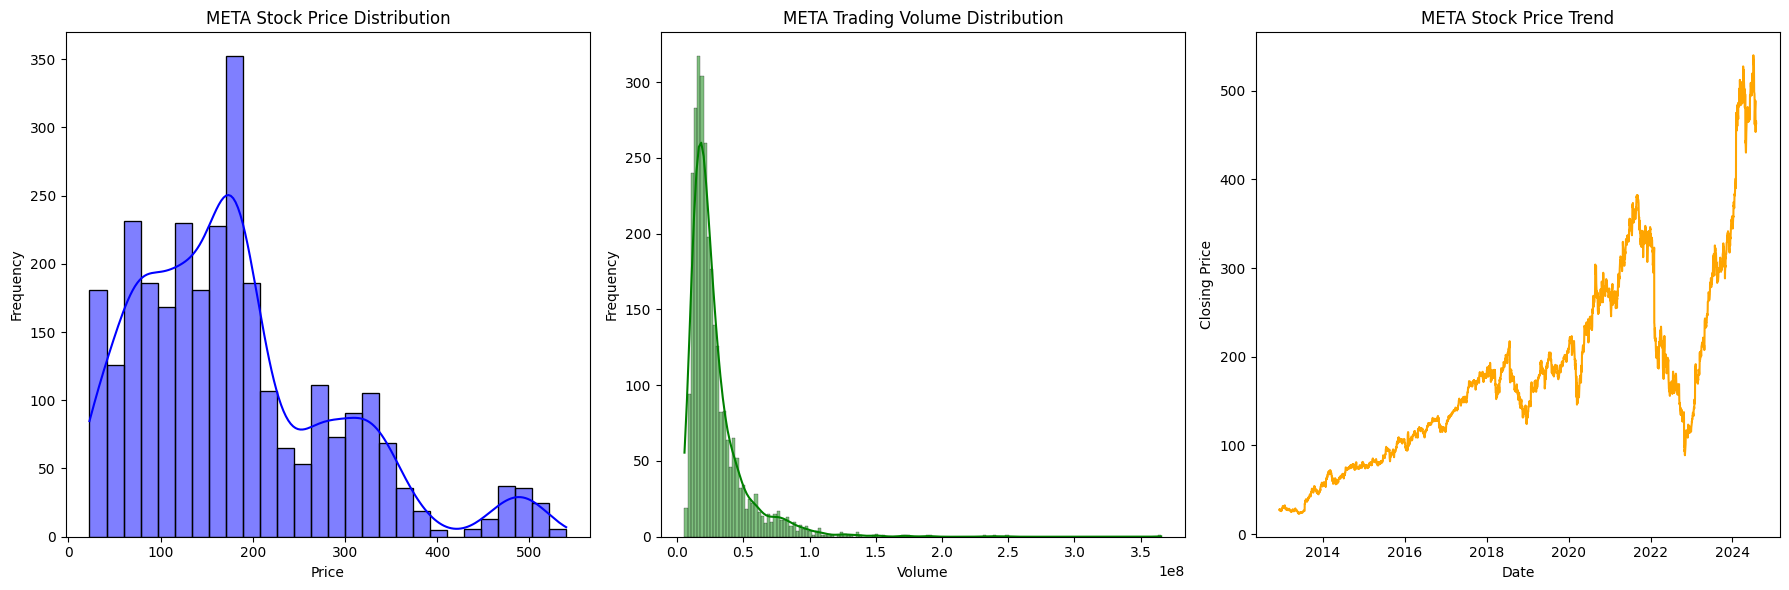

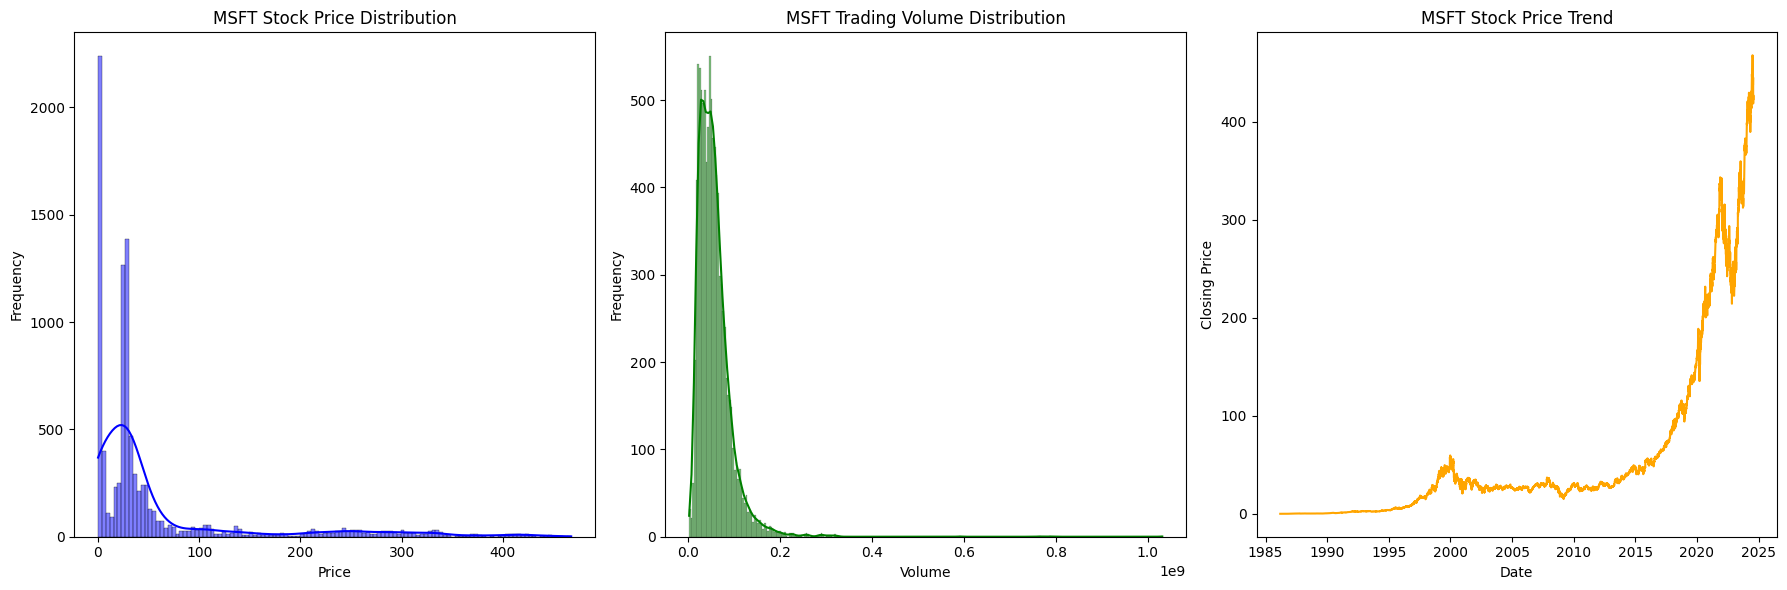

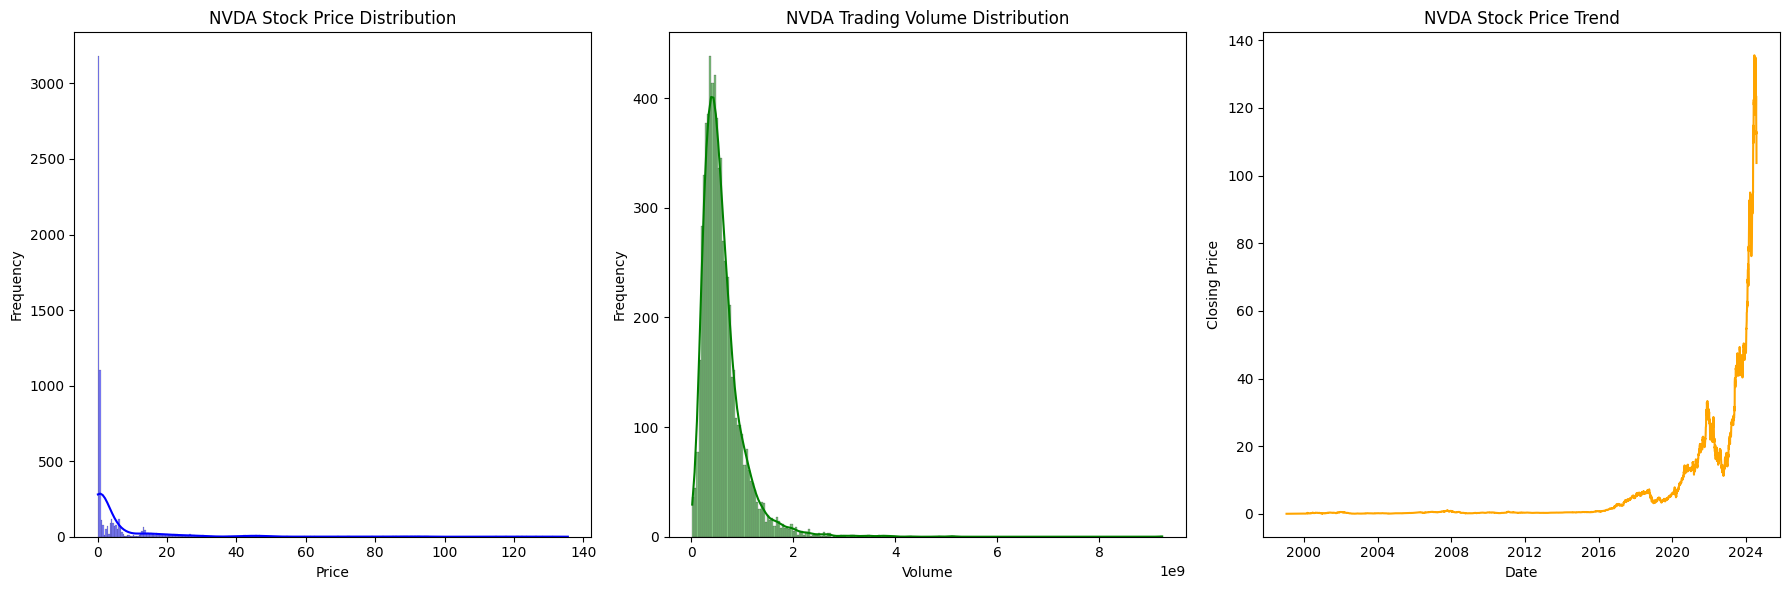

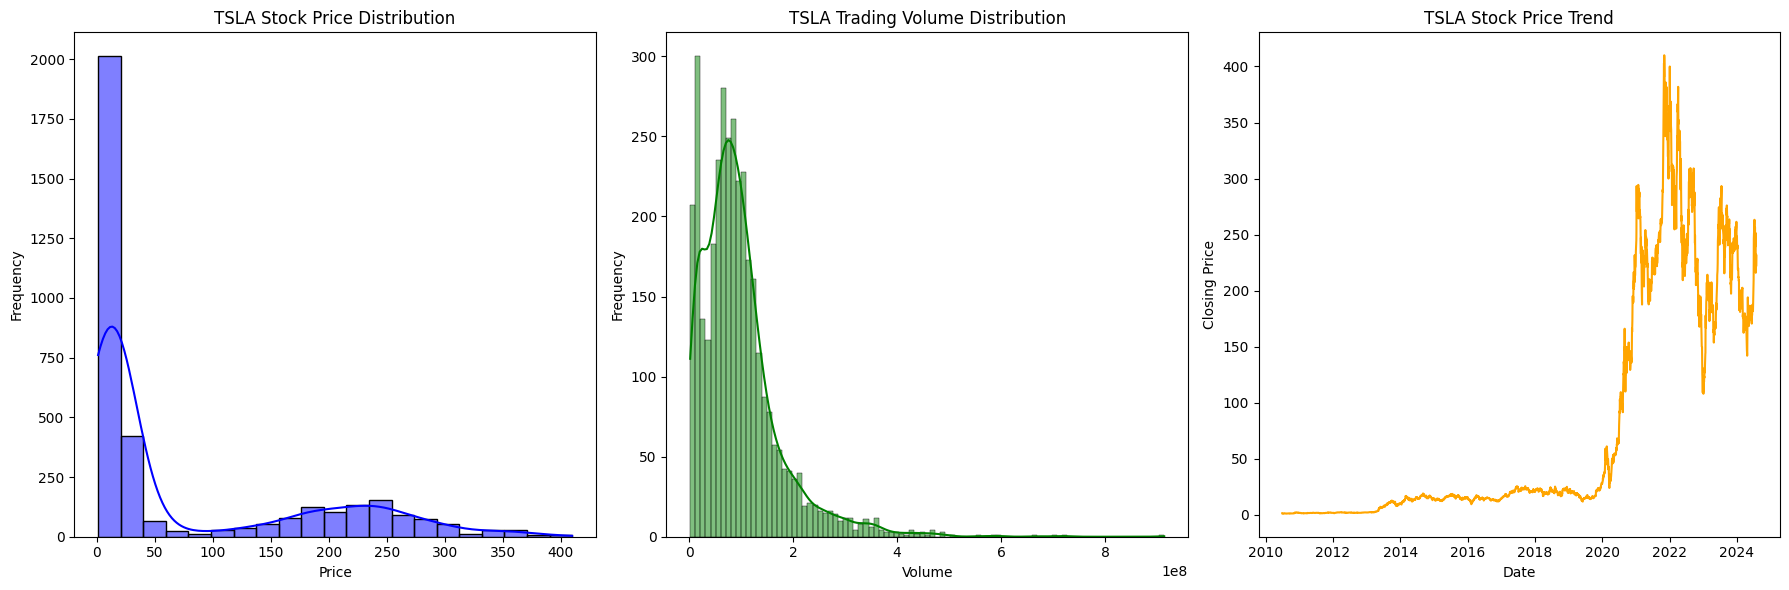

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot stock price distribution, volume distribution, and stock price trends
def plot_stock_data(data, ticker):
    # Set up the figure size for all plots
    plt.figure(figsize=(18, 6))

    # 1. Distribution of Closing Prices
    plt.subplot(1, 3, 1)
    sns.histplot(data['Close'], kde=True, color='blue')
    plt.title(f'{ticker} Stock Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    # 2. Distribution of Trading Volume
    plt.subplot(1, 3, 2)
    sns.histplot(data['Volume'], kde=True, color='green')
    plt.title(f'{ticker} Trading Volume Distribution')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')

    # 3. Stock Price Trend (Close over Time)
    plt.subplot(1, 3, 3)
    data['Date'] = pd.to_datetime(data['Date'])  # Convert Date to datetime
    plt.plot(data['Date'], data['Close'], color='orange')
    plt.title(f'{ticker} Stock Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')

    # Adjust layout to prevent overlapping of labels and titles
    plt.tight_layout()
    plt.show()

# Example of visualizations for each stock data

# Plot for GOOG_historical_data
plot_stock_data(GOOG_historical_data, 'GOOG')

# Plot for META_historical_data
plot_stock_data(META_historical_data, 'META')

# Plot for MSFT_historical_data
plot_stock_data(MSFT_historical_data, 'MSFT')

# Plot for NVDA_historical_data
plot_stock_data(NVDA_historical_data, 'NVDA')

# Plot for TSLA_historical_data
plot_stock_data(TSLA_historical_data, 'TSLA')


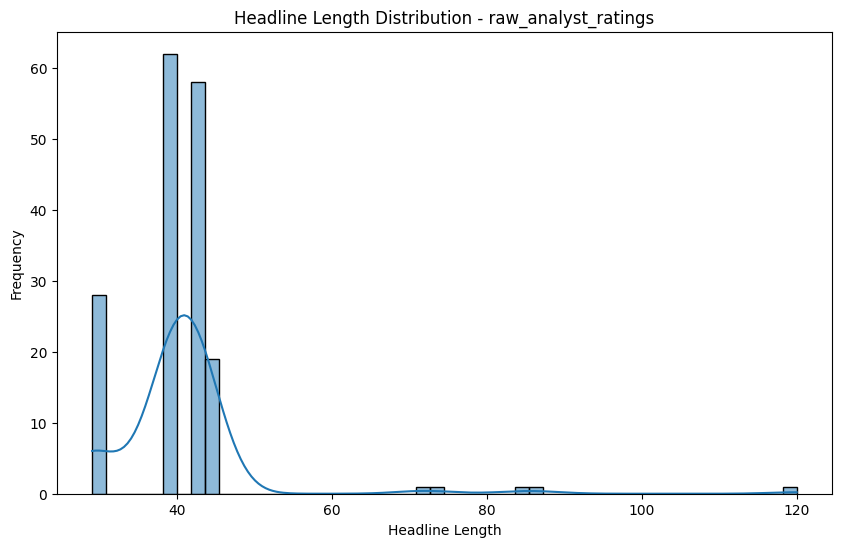

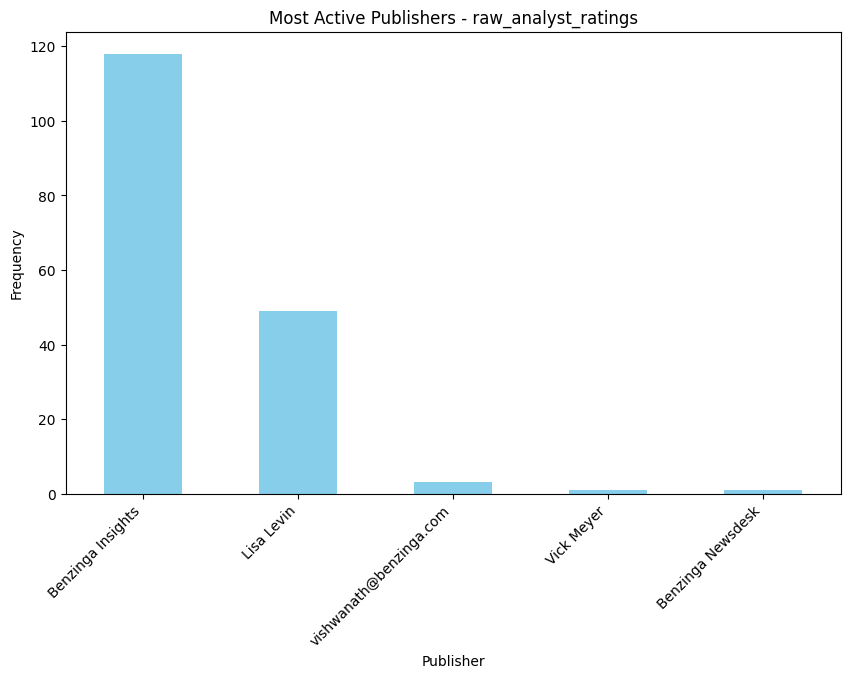

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create the visualizations
def visualize_data(data, dataset_name):
    # Visualization for Headline Length Distribution
    if 'headline_length' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data['headline_length'], bins=50, kde=True)
        plt.title(f'Headline Length Distribution - {dataset_name}')
        plt.xlabel('Headline Length')
        plt.ylabel('Frequency')
        plt.show()

    # Visualization for Most Active Publisher
    if 'publisher' in data.columns:
        publisher_counts = data['publisher'].value_counts().head(10)  # Top 10 active publishers
        plt.figure(figsize=(10, 6))
        publisher_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Most Active Publishers - {dataset_name}')
        plt.xlabel('Publisher')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.show()

# Apply the visualizations to all datasets
for name, data in datasets.items():
    visualize_data(data, name)


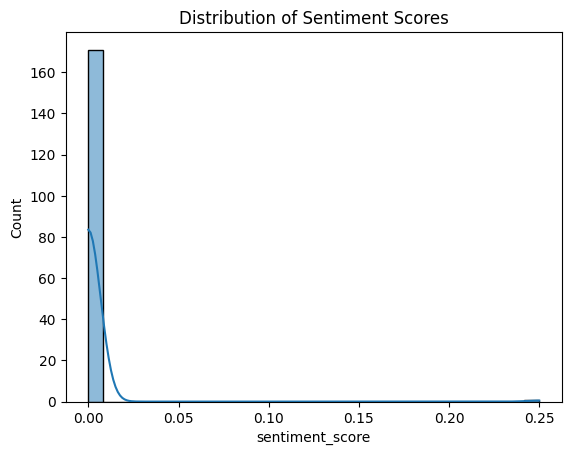

In [39]:
from textblob import TextBlob

# Perform sentiment analysis
def get_sentiment_score(headline):
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

raw_analyst_ratings['sentiment_score'] = raw_analyst_ratings['headline'].apply(get_sentiment_score)

# Visualize sentiment distribution
sns.histplot(raw_analyst_ratings['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

4. Correlation Analysis

Align dates and calculate stock movements

In [44]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

--2024-12-18 07:14:42--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-18 07:14:42--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-18 07:14:42--  http://versaweb.dl.sour

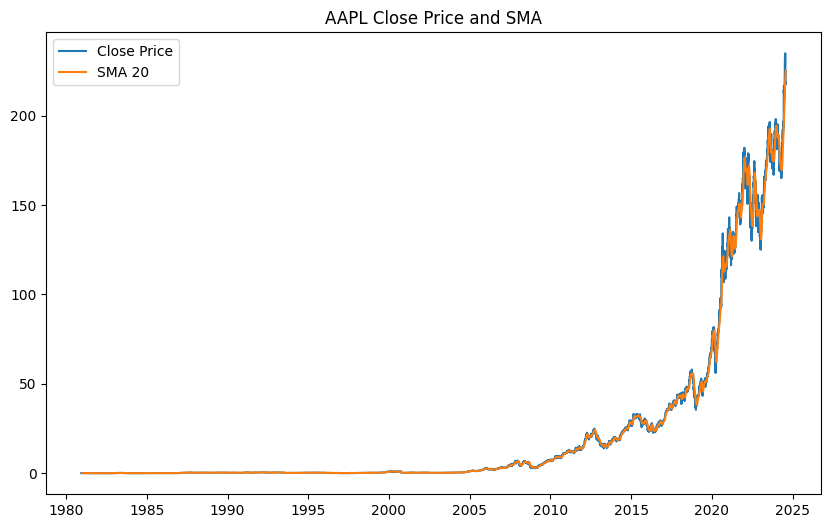

In [45]:

import talib

# Add a technical indicator
AAPL_historical_data['SMA_20'] = talib.SMA(AAPL_historical_data['Close'], timeperiod=20)
AAPL_historical_data['RSI'] = talib.RSI(AAPL_historical_data['Close'], timeperiod=14)

# Visualize indicators
plt.figure(figsize=(10, 6))
plt.plot(AAPL_historical_data['date'], AAPL_historical_data['Close'], label='Close Price')
plt.plot(AAPL_historical_data['date'], AAPL_historical_data['SMA_20'], label='SMA 20')
plt.title('AAPL Close Price and SMA')
plt.legend()
plt.show()


In [48]:
AAPL_historical_data['date'] = pd.to_datetime(AAPL_historical_data['Date'])


In [51]:
# Convert both date columns to UTC
raw_analyst_ratings['date'] = pd.to_datetime(raw_analyst_ratings['date']).dt.tz_convert('UTC')
AAPL_historical_data['date'] = pd.to_datetime(AAPL_historical_data['Date']).dt.tz_localize('UTC')

# Now merge the datasets
news_stock_data = pd.merge(
    raw_analyst_ratings,
    AAPL_historical_data[['date', 'Close']],
    on='date',
    how='inner'
)


In [52]:
# Normalize date and align data (convert both to UTC)
raw_analyst_ratings['date'] = pd.to_datetime(raw_analyst_ratings['date']).dt.tz_convert('UTC')
GOOG_historical_data['date'] = pd.to_datetime(GOOG_historical_data['Date']).dt.tz_localize('UTC')

# Now merge the datasets
news_stock_data = pd.merge(
    raw_analyst_ratings,
    GOOG_historical_data[['date', 'Close']],
    on='date',
    how='inner'
)

# Calculate daily returns
news_stock_data['daily_return'] = news_stock_data['Close'].pct_change()

# Aggregate sentiment scores
daily_sentiment = news_stock_data.groupby('date')['sentiment_score'].mean().reset_index()

# Merge with daily returns
correlation_data = pd.merge(
    daily_sentiment,
    news_stock_data[['date', 'daily_return']],
    on='date'
)

# Calculate Pearson correlation
correlation = correlation_data['sentiment_score'].corr(correlation_data['daily_return'])
print(f"Correlation between sentiment and daily returns for GOOG: {correlation}")


Correlation between sentiment and daily returns for GOOG: nan


In [54]:
print(correlation_data['sentiment_score'].nunique())  # Number of unique sentiment scores
print(correlation_data['daily_return'].nunique())  # Number of unique daily returns


0
0


In [53]:
print(correlation_data.isna().sum())


date               0
sentiment_score    0
daily_return       0
dtype: int64


(0, 10)


In [58]:
print(raw_analyst_ratings['date'].head())
print(AAPL_historical_data['date'].head())


0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]
0   1980-12-12 00:00:00+00:00
1   1980-12-15 00:00:00+00:00
2   1980-12-16 00:00:00+00:00
3   1980-12-17 00:00:00+00:00
4   1980-12-18 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]


In [60]:
news_stock_data = pd.merge(
    raw_analyst_ratings,
    AAPL_historical_data[['date', 'Close']],
    on='date',
    how='outer',  # This will keep all rows from both dataframes
    indicator=True  # Adds a column to show where the merge matched
)
print(news_stock_data['_merge'].value_counts())


_merge
right_only    10998
left_only       172
both              0
Name: count, dtype: int64


In [61]:
# Filter the date range for both datasets (e.g., 2020-2024)
raw_analyst_ratings = raw_analyst_ratings[raw_analyst_ratings['date'] >= '2020-01-01']
AAPL_historical_data = AAPL_historical_data[AAPL_historical_data['date'] >= '2020-01-01']

# Now try merging again
news_stock_data = pd.merge(
    raw_analyst_ratings,
    AAPL_historical_data[['date', 'Close']],
    on='date',
    how='inner'
)
print(news_stock_data.shape)


(0, 9)


In [62]:
common_start_date = max(raw_analyst_ratings['date'].min(), AAPL_historical_data['date'].min())
common_end_date = min(raw_analyst_ratings['date'].max(), AAPL_historical_data['date'].max())

print(f"Common date range: {common_start_date} to {common_end_date}")

# Filter both datasets based on the common date range
raw_analyst_ratings = raw_analyst_ratings[(raw_analyst_ratings['date'] >= common_start_date) & (raw_analyst_ratings['date'] <= common_end_date)]
AAPL_historical_data = AAPL_historical_data[(AAPL_historical_data['date'] >= common_start_date) & (AAPL_historical_data['date'] <= common_end_date)]

# Now try merging again
news_stock_data = pd.merge(
    raw_analyst_ratings,
    AAPL_historical_data[['date', 'Close']],
    on='date',
    how='inner'
)
print(news_stock_data.shape)


Common date range: 2020-05-22 12:06:17+00:00 to 2020-06-05 14:30:54+00:00
(0, 9)


In [65]:
news_stock_data = pd.merge(
    raw_analyst_ratings,
    AAPL_historical_data[['date', 'Close']],
    on='date',
    how='left'
)


In [66]:
# Convert both 'date' columns to just the date (ignoring time)
raw_analyst_ratings['date'] = raw_analyst_ratings['date'].dt.date
AAPL_historical_data['date'] = AAPL_historical_data['date'].dt.date

# Re-merge the datasets
news_stock_data = pd.merge(
    raw_analyst_ratings,
    AAPL_historical_data[['date', 'Close']],
    on='date',
    how='inner'
)

print(news_stock_data.shape)


(146, 9)


In [67]:
print(f"Common date range after stripping time: {raw_analyst_ratings['date'].min()} to {raw_analyst_ratings['date'].max()}")


Common date range after stripping time: 2020-05-22 to 2020-06-05


In [68]:
# Calculate daily returns
news_stock_data['daily_return'] = news_stock_data['Close'].pct_change()

# Aggregate sentiment scores
daily_sentiment = news_stock_data.groupby('date')['sentiment_score'].mean().reset_index()

# Merge with daily returns
correlation_data = pd.merge(
    daily_sentiment,
    news_stock_data[['date', 'daily_return']],
    on='date'
)

# Calculate Pearson correlation
correlation = correlation_data['sentiment_score'].corr(correlation_data['daily_return'])
print(f"Correlation between sentiment and daily returns: {correlation}")


Correlation between sentiment and daily returns: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


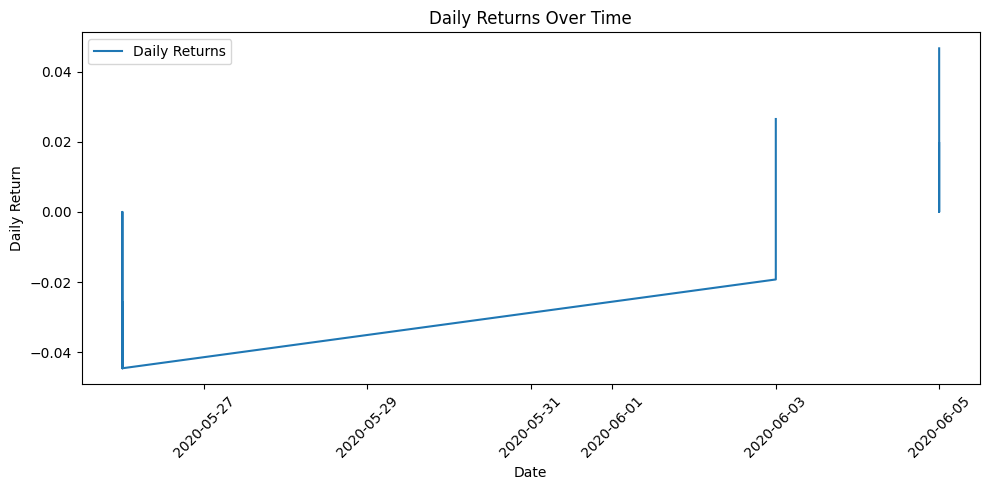

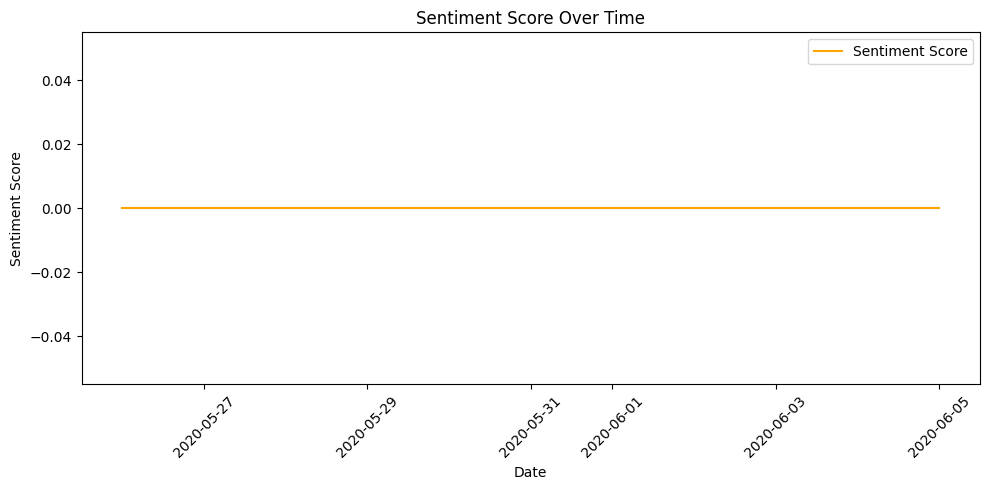

In [69]:
import matplotlib.pyplot as plt

# Plot daily returns
plt.figure(figsize=(10, 5))
plt.plot(correlation_data['date'], correlation_data['daily_return'], label='Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot sentiment scores
plt.figure(figsize=(10, 5))
plt.plot(correlation_data['date'], correlation_data['sentiment_score'], label='Sentiment Score', color='orange')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
# Check for missing values
print("Missing values in sentiment_score:", correlation_data['sentiment_score'].isnull().sum())
print("Missing values in daily_return:", correlation_data['daily_return'].isnull().sum())

# Check for constant values
print("Unique values in sentiment_score:", correlation_data['sentiment_score'].nunique())
print("Unique values in daily_return:", correlation_data['daily_return'].nunique())


Missing values in sentiment_score: 0
Missing values in daily_return: 1
Unique values in sentiment_score: 1
Unique values in daily_return: 7


In [71]:
# Drop rows with NaN values
correlation_data = correlation_data.dropna(subset=['sentiment_score', 'daily_return'])


In [72]:
# Recalculate the Pearson correlation after cleaning
correlation = correlation_data['sentiment_score'].corr(correlation_data['daily_return'])
print(f"Correlation between sentiment and daily returns: {correlation}")


Correlation between sentiment and daily returns: nan


In [73]:
# Normalize date and align data (convert both to UTC)
raw_analyst_ratings['date'] = pd.to_datetime(raw_analyst_ratings['date']).dt.tz_localize('UTC')
MSFT_historical_data['date'] = pd.to_datetime(MSFT_historical_data['Date']).dt.tz_localize('UTC')
NVDA_historical_data['date'] = pd.to_datetime(NVDA_historical_data['Date']).dt.tz_localize('UTC')
TSLA_historical_data['date'] = pd.to_datetime(TSLA_historical_data['Date']).dt.tz_localize('UTC')

# Merge the datasets
def calculate_correlation(stock_data, stock_name):
    stock_data = pd.merge(
        raw_analyst_ratings,
        stock_data[['date', 'Close']],
        on='date',
        how='inner'
    )

    # Calculate daily returns
    stock_data['daily_return'] = stock_data['Close'].pct_change()

    # Aggregate sentiment scores
    daily_sentiment = stock_data.groupby('date')['sentiment_score'].mean().reset_index()

    # Merge with daily returns
    correlation_data = pd.merge(
        daily_sentiment,
        stock_data[['date', 'daily_return']],
        on='date'
    )

    # Drop missing values
    correlation_data = correlation_data.dropna(subset=['daily_return'])

    # Calculate Pearson correlation
    correlation = correlation_data['sentiment_score'].corr(correlation_data['daily_return'])
    print(f"Correlation between sentiment and daily returns for {stock_name}: {correlation}")

# Apply to MSFT, NVDA, TSLA
calculate_correlation(MSFT_historical_data, "MSFT")
calculate_correlation(NVDA_historical_data, "NVDA")
calculate_correlation(TSLA_historical_data, "TSLA")


Correlation between sentiment and daily returns for MSFT: 0.22641230485953365
Correlation between sentiment and daily returns for NVDA: 0.6066556234282754
Correlation between sentiment and daily returns for TSLA: -0.05619620066286494


Correlation between sentiment and daily returns for MSFT: 0.22641230485953365


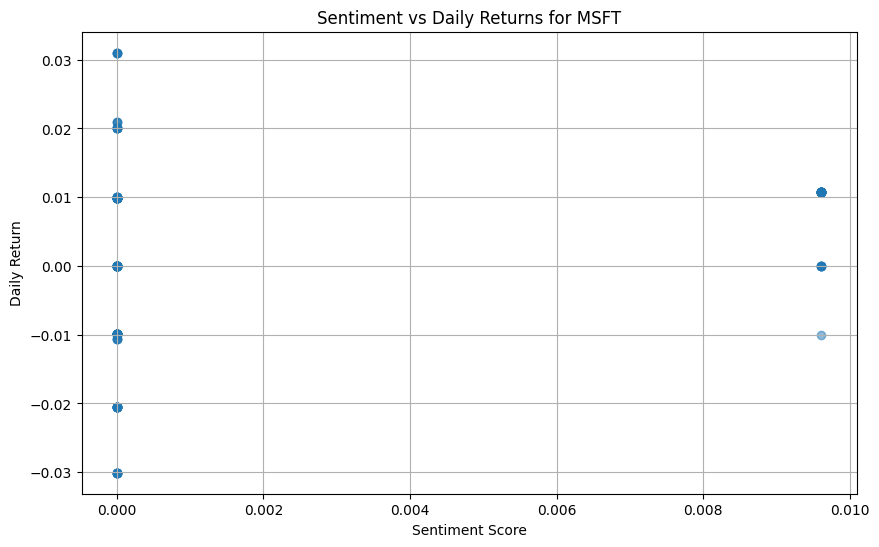

Correlation between sentiment and daily returns for NVDA: 0.6066556234282754


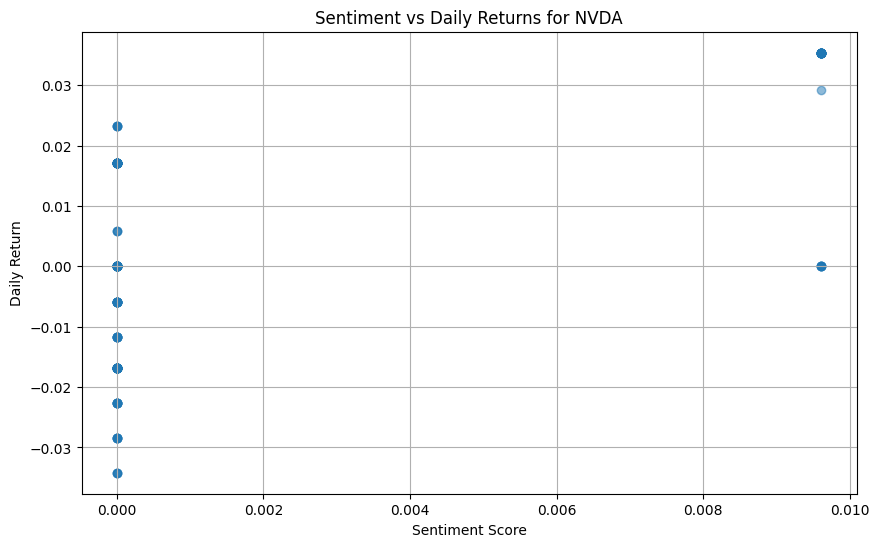

Correlation between sentiment and daily returns for TSLA: -0.05619620066286494


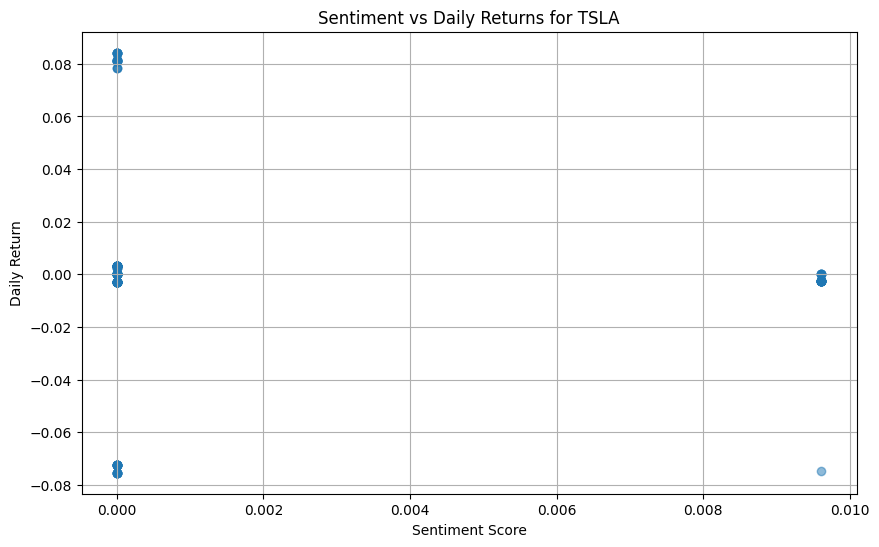

In [81]:
def calculate_correlation_and_plot(stock_data, stock_name):
    # Merge the datasets
    stock_data = pd.merge(
        raw_analyst_ratings,
        stock_data[['date', 'Close']],
        on='date',
        how='inner'
    )

    # Check if sentiment_score column exists after merge
    if 'sentiment_score' not in stock_data.columns:
        print(f"Sentiment score column is missing for {stock_name}")
        return

    # Calculate daily returns
    stock_data['daily_return'] = stock_data['Close'].pct_change()

    # Aggregate sentiment scores
    daily_sentiment = stock_data.groupby('date')['sentiment_score'].mean().reset_index()

    # Merge with daily returns
    correlation_data = pd.merge(
        daily_sentiment,
        stock_data[['date', 'daily_return']],
        on='date'
    )

    # Drop missing values
    correlation_data = correlation_data.dropna(subset=['daily_return'])

    # Calculate Pearson correlation
    correlation = correlation_data['sentiment_score'].corr(correlation_data['daily_return'])
    print(f"Correlation between sentiment and daily returns for {stock_name}: {correlation}")

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.scatter(correlation_data['sentiment_score'], correlation_data['daily_return'], alpha=0.5)
    plt.title(f"Sentiment vs Daily Returns for {stock_name}")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Daily Return")
    plt.grid(True)
    plt.show()

# Apply to MSFT, NVDA, TSLA
calculate_correlation_and_plot(MSFT_historical_data, "MSFT")
calculate_correlation_and_plot(NVDA_historical_data, "NVDA")
calculate_correlation_and_plot(TSLA_historical_data, "TSLA")
